<a href="https://colab.research.google.com/github/thegr1ffyn/Artificial-Intelligence/blob/main/Lectures/Lecture%2012/lstm_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hamza Haroon
### 211064 BSCYS-VI-A
### AI LAB TASK 07/05/2024

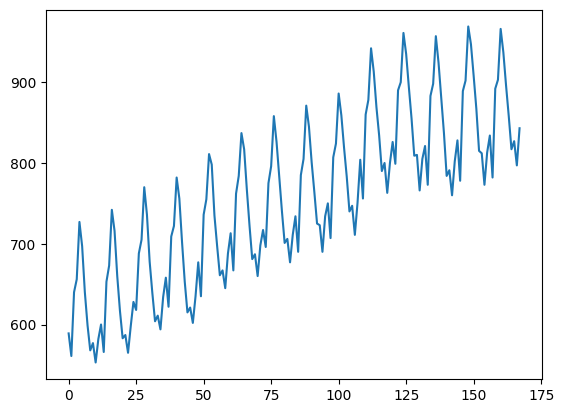

In [ ]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/drive/MyDrive/AI/milk.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

112 56


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
110/110 - 2s - loss: 0.1484 - 2s/epoch - 20ms/step
Epoch 2/100
110/110 - 0s - loss: 0.0747 - 192ms/epoch - 2ms/step
Epoch 3/100
110/110 - 0s - loss: 0.0414 - 186ms/epoch - 2ms/step
Epoch 4/100
110/110 - 0s - loss: 0.0313 - 178ms/epoch - 2ms/step
Epoch 5/100
110/110 - 0s - loss: 0.0285 - 184ms/epoch - 2ms/step
Epoch 6/100
110/110 - 0s - loss: 0.0270 - 176ms/epoch - 2ms/step
Epoch 7/100
110/110 - 0s - loss: 0.0258 - 181ms/epoch - 2ms/step
Epoch 8/100
110/110 - 0s - loss: 0.0243 - 180ms/epoch - 2ms/step
Epoch 9/100
110/110 - 0s - loss: 0.0231 - 182ms/epoch - 2ms/step
Epoch 10/100
110/110 - 0s - loss: 0.0221 - 183ms/epoch - 2ms/step
Epoch 11/100
110/110 - 0s - loss: 0.0206 - 183ms/epoch - 2ms/step
Epoch 12/100
110/110 - 0s - loss: 0.0196 - 175ms/epoch - 2ms/step
Epoch 13/100
110/110 - 0s - loss: 0.0184 - 183ms/epoch - 2ms/step
Epoch 14/100
110/110 - 0s - loss: 0.0173 - 245ms/epoch - 2ms/step
Epoch 15/100
110/110 - 0s - loss: 0.0164 - 243ms/epoch - 2ms/step
Epoch 16/100
110/110 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 5ms/step
Train Score: 43.06 RMSE
Test Score: 51.46 RMSE


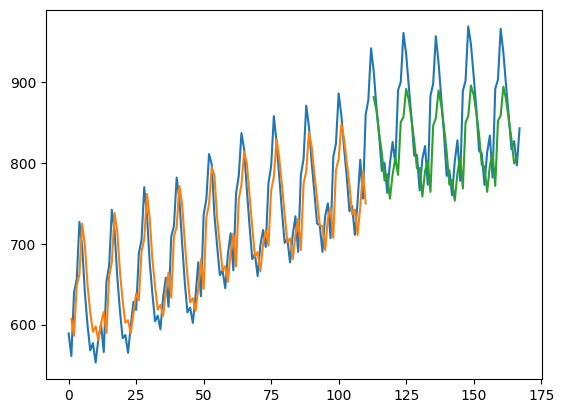

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
108/108 - 2s - loss: 0.0696 - 2s/epoch - 20ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0236 - 189ms/epoch - 2ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0202 - 180ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0192 - 184ms/epoch - 2ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0179 - 182ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0168 - 168ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0161 - 173ms/epoch - 2ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0150 - 178ms/epoch - 2ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0141 - 170ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0135 - 187ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0128 - 173ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0124 - 179ms/epoch - 2ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0117 - 179ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0115 - 175ms/epoch - 2ms/step
Epoch 15/100
108/108 - 0s - loss: 0.0114 - 181ms/epoch - 2ms/step
Epoch 16/100
108/108 

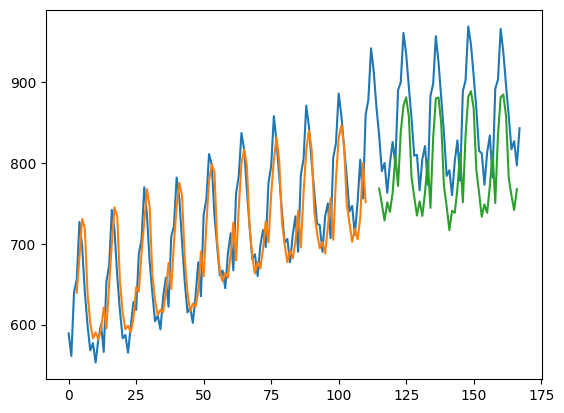

In [ ]:
# LSTM for international airline passengers problem with window regression framing

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('/content/drive/MyDrive/AI/milk.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
108/108 - 3s - loss: 0.1132 - 3s/epoch - 26ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0401 - 304ms/epoch - 3ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0268 - 205ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0253 - 197ms/epoch - 2ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0241 - 219ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0232 - 206ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0225 - 209ms/epoch - 2ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0215 - 204ms/epoch - 2ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0208 - 215ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0204 - 215ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0197 - 203ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0195 - 201ms/epoch - 2ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0191 - 203ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0187 - 223ms/epoch - 2ms/step
Epoch 15/100
108/108 - 0s - loss: 0.0186 - 202ms/epoch - 2ms/step
Epoch 16/100
108/108 

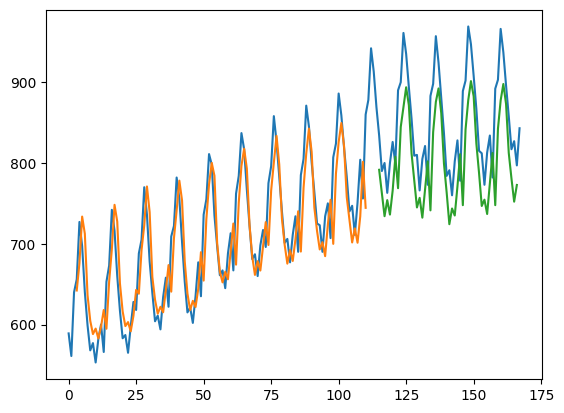

In [ ]:
# LSTM for international airline passengers problem with time step regression framing

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('/content/drive/MyDrive/AI/milk.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

108/108 - 2s - loss: 0.0275 - 2s/epoch - 22ms/step
108/108 - 0s - loss: 0.0238 - 198ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0227 - 197ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0219 - 203ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0212 - 210ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0206 - 202ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0201 - 208ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0196 - 211ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0191 - 202ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0186 - 216ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0182 - 203ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0178 - 200ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0174 - 204ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0170 - 215ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0166 - 209ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0162 - 199ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0158 - 210ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0155 - 202ms/epoch - 2ms/step
108/108 - 0s - loss: 0.0151 - 204ms/epoch - 2ms/

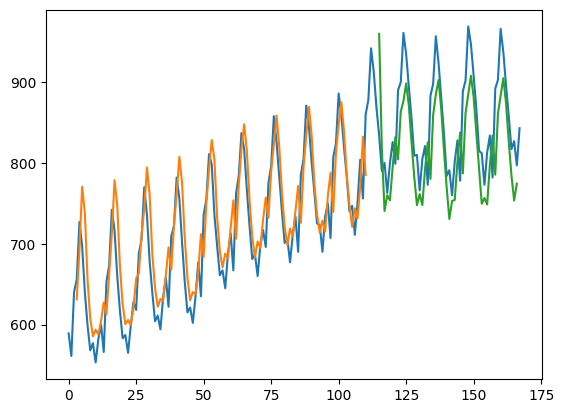

In [ ]:
# LSTM for international airline passengers problem with memory

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('/content/drive/MyDrive/AI/milk.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

108/108 - 4s - loss: 0.0274 - 4s/epoch - 37ms/step
108/108 - 0s - loss: 0.0297 - 418ms/epoch - 4ms/step
108/108 - 0s - loss: 0.0297 - 381ms/epoch - 4ms/step
108/108 - 0s - loss: 0.0298 - 294ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0298 - 303ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0297 - 316ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0296 - 295ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0293 - 310ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0290 - 298ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0286 - 304ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0283 - 305ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0278 - 292ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0273 - 321ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0268 - 306ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0263 - 331ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0257 - 327ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0250 - 303ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0244 - 297ms/epoch - 3ms/step
108/108 - 0s - loss: 0.0237 - 330ms/epoch - 3ms/

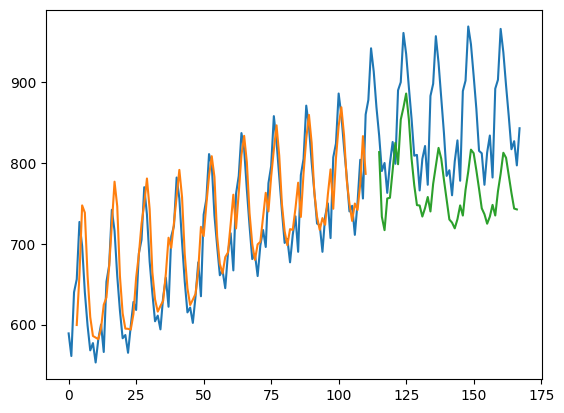

In [ ]:
# Stacked LSTM for international airline passengers problem with memory

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('/content/drive/MyDrive/AI/milk.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()